In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
def plot_data(x, y, ylabel):
    f = plt.figure() 
    f.set_figwidth(15) 
    f.set_figheight(6) 
    plt.plot(x, y )
    plt.xlabel("Дата")
    plt.ylabel(ylabel)

    ticks = ['2019-01', '2020-01', '2021-01', '2022-01', '2022-01', '2023-01']
    minor_ticks = x
    plt.xticks(ticks)
    plt.xticks(minor_ticks, minor=True)
    plt.grid(which='both')
    plt.grid(which='minor', alpha=0.2)
    plt.grid(which='major', alpha=0.5)

# График динамики курса рубля к доллару США

In [133]:
usd_rub_df = pd.read_excel("usd_stat.xlsx")
usd_rub_df["year_month"] = usd_rub_df["data"].dt.strftime("%Y-%m")
usd_rub_df = usd_rub_df.groupby("year_month").agg({"curs": "mean"}).reset_index()

c:\Users\Mi\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


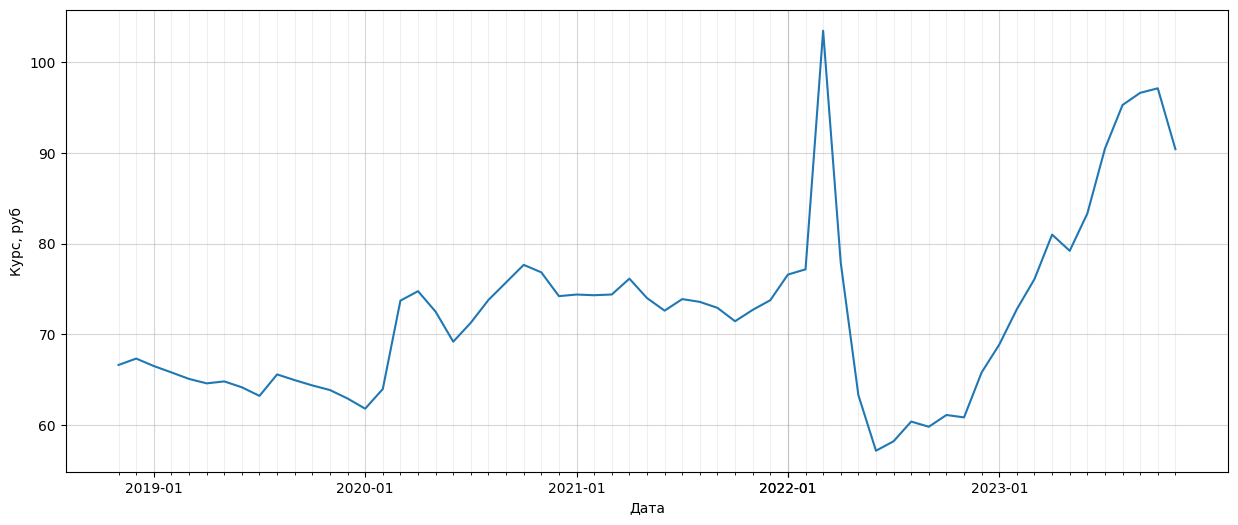

In [134]:
plot_data(usd_rub_df["year_month"], usd_rub_df["curs"], "Курс, руб")

# График динамики индекса ИПЦ

In [135]:
rosstat_df = pd.read_csv("rosstat.csv")


rosstat_df = rosstat_df.rename(columns={" Январь": "01", 
                                        " Февраль": "02", 
                                        " Март": "03", 
                                        " Апрель": "04", 
                                        " Май": "05", 
                                        " Июнь": "06", 
                                        " Июль": "07", 
                                        " Август": "08", 
                                        " Сентябрь": "09", 
                                        " Октябрь": "10", 
                                        " Ноябрь": "11", 
                                        " Декабрь": "12",
                                        "Год": "year"}
                                )


keys = rosstat_df.columns[1:]
rosstat_df = pd.melt(rosstat_df, id_vars='year', value_vars=keys, value_name='IPZ')

rosstat_df['year_month'] = rosstat_df[["year", "variable"]].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
rosstat_df = rosstat_df[(rosstat_df["year_month"] >= "2018-11") & (rosstat_df["year_month"] <= "2023-11")]
rosstat_df = rosstat_df[["year_month", "IPZ"]].sort_values('year_month')

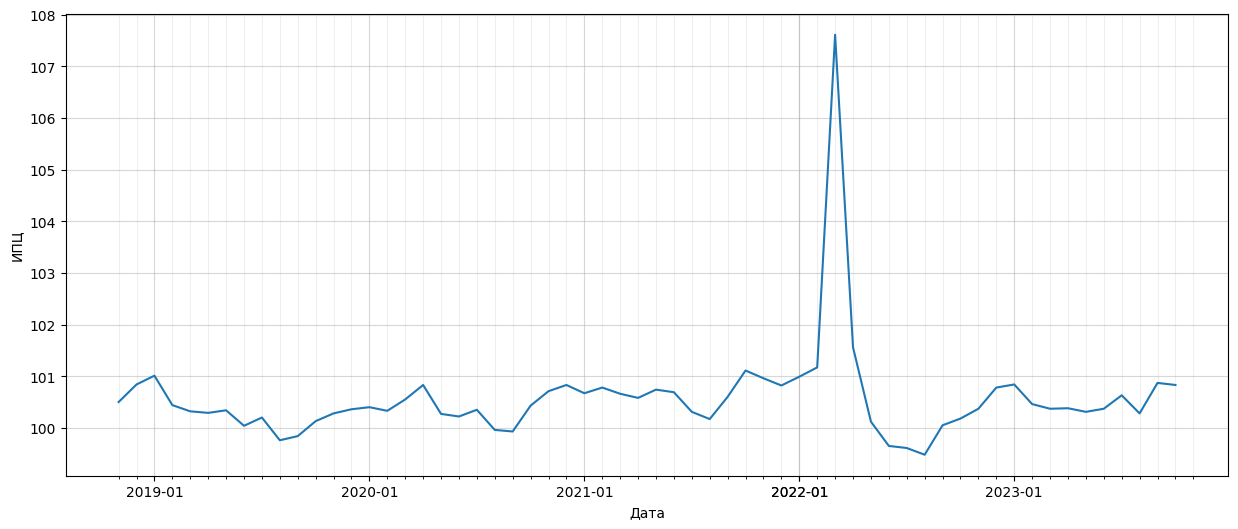

In [136]:
plot_data(rosstat_df["year_month"], rosstat_df["IPZ"], "ИПЦ")


# Вывод:
На двух графиках отчетливо выделяется пик - март 2022 года. В этот период рубль сильно ослабился, что не могло не отразиться на индексе потребительких цен
